# Classification Hackathon Student Solution

# 1. Importing Packages

In [1]:
# Libraries for data loading, manipulation, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Natural Language Processing (NLP) library
import nltk
from nltk.tokenize import word_tokenize

# Feature Extraction:
from sklearn.feature_extraction.text import TfidfVectorizer

# Metrics and Model Perfomance
from sklearn.metrics import accuracy_score, classification_report

# Machine Learning Models:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.pipeline import make_pipeline

# Download the necessary NLTK data (only needed once)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 2. Loading Data

In [2]:
# Load both test & train data
df_train = pd.read_csv('train_set.csv',encoding='UTF-8')
df_test = pd.read_csv('test_set.csv',encoding = 'UTF-8')

# 3. Exploratory Data Analysis (EDA)

In [3]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [5]:
df_train.shape

(33000, 2)

In [6]:
df_test.shape

(5682, 2)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [9]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [10]:
df_test.isnull().sum()

index    0
text     0
dtype: int64

- No null values for both `train` & `test`.

## 3.1 Class Distribution

In [11]:
class_distribution = df_train['lang_id'].value_counts()

class_distribution

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

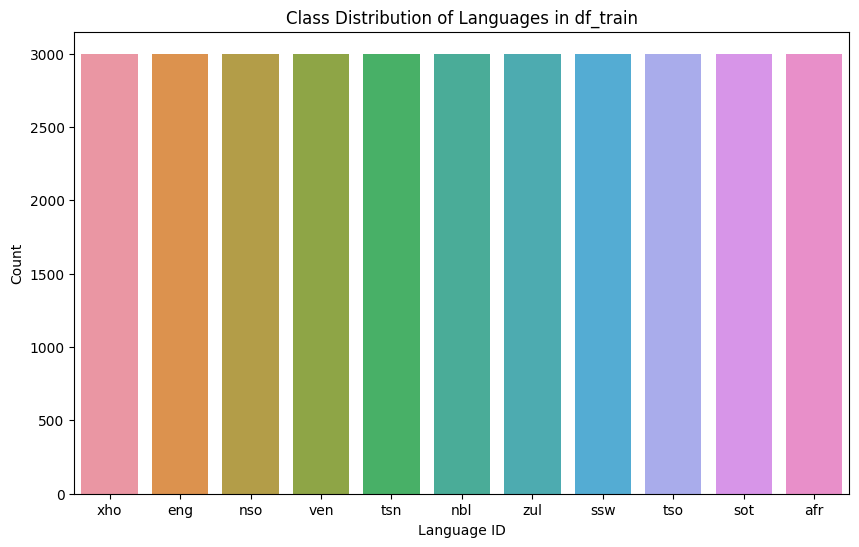

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='lang_id', data=df_train)
plt.title('Class Distribution of Languages in df_train')
plt.xlabel('Language ID')
plt.ylabel('Count')
plt.show()

- The classes are balanced which is great for the process of machine learning.

# 4. Text Pre-Processing

In [13]:
def preprocess_text(text):
    """
    Preprocess the text by:
    1. Converting to lowercase.
    2. Removing extra whitespace.

    Parameters:
    text (str): The text to preprocess.

    Returns:
    str: Preprocessed text.
    """
    # Convert to lowercase
    text = text.lower()

    # Remove extra whitespaces
    text = ' '.join(text.split())

    return text

In [14]:
df_train['clean_text'] = df_train['text'].apply(preprocess_text)
df_test['clean_text'] = df_test['text'].apply(preprocess_text)

In [15]:
df_train.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### Tokenization

In [16]:
def tokenize_text(text):
    """
    Tokenize the text into words.

    Parameters:
    text (str): The text to tokenize.

    Returns:
    list[str]: A list of words (tokens) from the text.
    """
    # Tokenize the text into words
    tokens = word_tokenize(text)

    return tokens


In [17]:
df_train['tokens'] = df_train['clean_text'].apply(tokenize_text)
df_test['tokens'] = df_test['clean_text'].apply(tokenize_text)

In [22]:
# Convert the tokenized lists to text within the DataFrame
df_train['new_token'] = df_train['tokens'].apply(lambda tokens: ' '.join(tokens))
df_test['new_token'] = df_test['tokens'].apply(lambda tokens: ' '.join(tokens))

In [18]:
df_train.head()

,lang_id,text,clean_text,tokens
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo-siseko wenza amalungiselelo kumaziko ax...,"[umgaqo-siseko, wenza, amalungiselelo, kumazik..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i-dha iya kuba nobulumko bokubeka umsebenzi na...,"[i-dha, iya, kuba, nobulumko, bokubeka, umsebe..."
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu-natal department of tr...,"[the, province, of, kwazulu-natal, department,..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


# 5. Feature Engineering

## Train & Test Split

In [23]:
X = df_train['new_token']
Y = df_train['lang_id']

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X , Y, test_size =0.2, random_state=42)

# 6. Model Training

### 6.1 MultinomialNB Naive Bayes

In [25]:
# Create a pipeline with TF-IDF Vectorizer and Naive Bayes Classifier
NB_model_1 = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=0.1))

# Train the model
NB_model_1.fit(X_train, y_train)

# Predictions
NB_y_pred_1 = NB_model_1.predict(X_test)

# Evaluate the model
NB_accuracy_1 = accuracy_score(y_test, NB_y_pred_1)

NB_classification_rep_1 = classification_report(y_test, NB_y_pred_1)

# Print the results
print(f"Accuracy: {NB_accuracy_1:.9f}")
print("\nClassification Report:")
print(NB_classification_rep_1)

Accuracy: 0.999090909

Classification Report:
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       1.00      1.00      1.00       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      1.00      1.00       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### 6.2 Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Create a TF-IDF Vectorizer
RF_vectorizer = TfidfVectorizer()

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with the vectorizer and Random Forest Classifier
rf_model = make_pipeline(RF_vectorizer, rf_classifier)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predictions on the test set
RF_y_pred = rf_model.predict(X_test)

# Evaluate the model
RF_accuracy = accuracy_score(y_test, RF_y_pred)
RF_classification_rep = classification_report(y_test, RF_y_pred)

# Print the results
print(f"Accuracy: {RF_accuracy:.9f}")
print("\nClassification Report:")
print(RF_classification_rep)

Accuracy: 0.987121212

Classification Report:
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       0.99      1.00      1.00       615
         nbl       0.97      0.96      0.96       583
         nso       1.00      1.00      1.00       625
         sot       0.99      1.00      1.00       618
         ssw       0.99      0.98      0.99       584
         tsn       1.00      0.99      0.99       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      0.97      0.98       609
         zul       0.93      0.96      0.94       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



### 6.3 SVM

In [61]:
# Create a TF-IDF Vectorizer
SVM_vectorizer = TfidfVectorizer()

# Create a Support Vector Machine Classifier
svm_classifier = SVC(C=10, kernel='rbf', random_state=42)

# Create a pipeline with the vectorizer and SVM Classifier
svm_model = make_pipeline(SVM_vectorizer, svm_classifier)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predictions on the test set
SVM_y_pred = svm_model.predict(X_test)

# Evaluate the model
SVM_accuracy = accuracy_score(y_test, SVM_y_pred)
SVM_classification_rep = classification_report(y_test, SVM_y_pred)

# Print the results
print(f"Accuracy: {SVM_accuracy:.9f}")
print("\nClassification Report:")
print(SVM_classification_rep)

Accuracy: 0.995151515

Classification Report:
              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.99      1.00      0.99       609
         zul       0.97      0.99      0.98       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### 6.4 KNeighborsClassifier

In [50]:
# Create a TF-IDF Vectorizer
knn_vectorizer = TfidfVectorizer()

# Create a K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)

# Create a pipeline with the vectorizer and KNN Classifier
knn_model = make_pipeline(knn_vectorizer, knn_classifier)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Predictions on the test set
KNN_y_pred = knn_model.predict(X_test)

# Evaluate the model
KNN_accuracy = accuracy_score(y_test, KNN_y_pred)
KNN_classification_rep = classification_report(y_test, KNN_y_pred)

# Print the results
print(f"Accuracy: {KNN_accuracy:.9f}")
print("\nClassification Report:")
print(KNN_classification_rep)

Accuracy: 0.971060606

Classification Report:
              precision    recall  f1-score   support

         afr       0.99      1.00      1.00       583
         eng       0.97      1.00      0.99       615
         nbl       0.90      0.97      0.93       583
         nso       0.96      0.99      0.97       625
         sot       0.99      0.99      0.99       618
         ssw       0.99      0.97      0.98       584
         tsn       0.97      0.96      0.96       598
         tso       0.98      1.00      0.99       561
         ven       0.99      1.00      0.99       634
         xho       0.96      0.93      0.95       609
         zul       0.98      0.87      0.93       590

    accuracy                           0.97      6600
   macro avg       0.97      0.97      0.97      6600
weighted avg       0.97      0.97      0.97      6600



### 6.5 XGBoosting

In [45]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder to your label set and transform it to numeric labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now use y_train_encoded and y_test_encoded for training and testing your model


In [47]:
# Create a TF-IDF Vectorizer
xgb_vectorizer = TfidfVectorizer()

# Create an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Create a pipeline with the vectorizer and XGBoost Classifier
xgb_model = make_pipeline(xgb_vectorizer, xgb_classifier)

# Train the model on the training data
xgb_model.fit(X_train, y_train_encoded)

# Predictions on the test set
XGB_y_pred_encoded = xgb_model.predict(X_test)

# Decode the predicted labels back to original string labels
XGB_y_pred = label_encoder.inverse_transform(XGB_y_pred_encoded)

# Evaluate the model
XGB_accuracy = accuracy_score(y_test, XGB_y_pred)
XGB_classification_rep = classification_report(y_test, XGB_y_pred)

# Print the results
print(f"Accuracy: {XGB_accuracy:.9f}")
print("\nClassification Report:")
print(XGB_classification_rep)

Accuracy: 0.977878788

Classification Report:
              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       0.99      1.00      1.00       615
         nbl       0.94      0.95      0.94       583
         nso       1.00      0.99      0.99       625
         sot       1.00      1.00      1.00       618
         ssw       0.94      0.96      0.95       584
         tsn       0.99      0.99      0.99       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.98      0.94      0.96       609
         zul       0.92      0.93      0.93       590

    accuracy                           0.98      6600
   macro avg       0.98      0.98      0.98      6600
weighted avg       0.98      0.98      0.98      6600



### 6.6 VotingClassifier

In [51]:
# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('nb', NB_model_1),
        ('rf', rf_model),
        ('knn', knn_model)
    ], voting='hard')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predictions on the test set
voting_y_pred = voting_clf.predict(X_test)

# Evaluate the model
voting_accuracy = accuracy_score(y_test, voting_y_pred)
voting_classification_rep = classification_report(y_test, voting_y_pred)

# Print the results
print(f"Accuracy: {voting_accuracy:.9f}")
print("\nClassification Report:")
print(voting_classification_rep)


Accuracy: 0.996515152

Classification Report:
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       0.99      1.00      1.00       615
         nbl       0.98      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       0.99      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      0.98      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# 7. Model Evaluation

In [62]:
import pandas as pd
from sklearn.metrics import f1_score

# Extracting weighted F1 scores from the classification reports
NB_f1 = f1_score(y_test, NB_y_pred_1, average='weighted')
RF_f1 = f1_score(y_test, RF_y_pred, average='weighted')
SVM_f1 = f1_score(y_test, SVM_y_pred, average='weighted')
KNN_f1 = f1_score(y_test, KNN_y_pred, average='weighted')
XGB_f1 = f1_score(y_test, XGB_y_pred, average='weighted')
voting_f1 = f1_score(y_test, voting_y_pred, average='weighted')

# Creating a DataFrame
model_performance = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'SVM', 'KNN', 'XGBoost', 'Voting Classifier'],
    'F1 Score': [NB_f1, RF_f1, SVM_f1, KNN_f1, XGB_f1, voting_f1]
})

model_performance


,Model,F1 Score
0,Naive Bayes,0.999091
1,Random Forest,0.987167
2,SVM,0.995163
3,KNN,0.970893
4,XGBoost,0.977904
5,Voting Classifier,0.996514


- Naive Bayes has the highest F1-Score which is **0.99091**.

# 8. Model Evaluation - Selecting Best Model

In [64]:
# Sorting the DataFrame by F1 Score
model_performance = model_performance.sort_values('F1 Score', ascending=False)


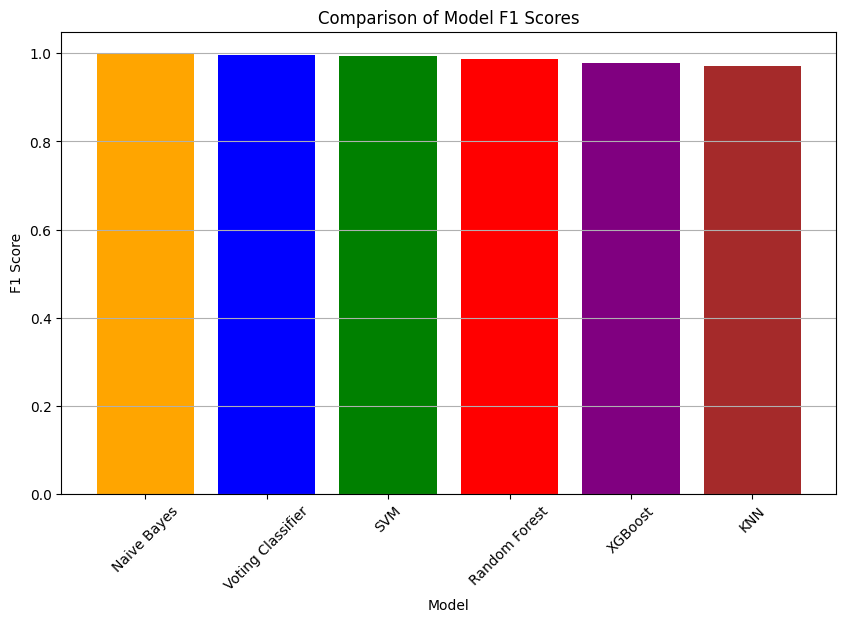

In [67]:
# Different colors for each model's bar
colors = ['orange', 'blue', 'green', 'red', 'purple', 'brown']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_performance['Model'], model_performance['F1 Score'], color=colors)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Comparison of Model F1 Scores')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

- After soring the model, Naive Bayes has the highest F1-Score

# 9. Submission - Naive Bayes

In [26]:
X_Submission = df_test['new_token']
y_submission = NB_model_1.predict(X_Submission)

In [27]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'index': df_test.index,
    'lang_id': y_submission
})

In [28]:
# Increment the 'index' column by 1
submission_df['index'] += 1

In [29]:
# Save the DataFrame to a CSV file
submission_file_path = 'Naive Bayes Submmision.csv'
submission_df.to_csv(submission_file_path, index= False)


In [72]:
submission_df

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot
